In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





In [2]:
class CarPricePredictor:
    def __init__(self, file_path):
        self.carset = pd.read_csv(file_path)
        self.preprocess_data()
        self.m = self.X.shape[0]
        self.n = self.X.shape[1]
        self.w = np.zeros(self.n) 
        self.b = 0
        self.cost_history = [] 

    def preprocess_data(self):
       
        self.carset = pd.get_dummies(self.carset, columns=[
            'fueltype', 'aspiration', 'doornumber', 'carbody', 
            'drivewheel', 'enginelocation', 'enginetype', 
            'cylindernumber', 'fuelsystem'])
       
        self.carset = self.carset.replace({True: 1, False: 0})
       
        self.X = self.carset[list(self.carset.columns.difference(['price', 'CarName', 'car_ID']))].values
        self.Y = self.carset['price'].values
       
        self.X = (self.X - self.X.mean(axis=0)) / self.X.std(axis=0)

    def compute_cost(self):
        
        total_cost = 0
        for i in range(self.m):
            prediction = np.dot(self.X[i], self.w) + self.b
            total_cost += (prediction - self.Y[i]) ** 2
        return total_cost / (2 * self.m)

    def gradient_descent(self, alpha, iterations):
        for _ in range(iterations):
            dw = np.zeros(self.n)
            db = 0
            
            for i in range(self.m): 
                prediction = np.dot(self.X[i], self.w) + self.b
                error = prediction - self.Y[i]
                dw += (1/self.m) * error * self.X[i] 
                db += (1/self.m) * error
           
            self.w -= alpha * dw
            self.b -= alpha * db
           
            cost = self.compute_cost()
            self.cost_history.append(cost)

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def R2score(self):
        SSres = 0  
        SStot = 0  
        mean_y = self.Y.mean()  
       
        for i in range(self.m):
            yhat = self.predict(self.X[i]) 
            SSres += (self.Y[i] - yhat) ** 2  
            SStot += (self.Y[i] - mean_y) ** 2 
        return 1 - (SSres / SStot)


C:\Users\pkmna\AppData\Local\Temp\ipykernel_4344\1797004774.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.carset = self.carset.replace({True: 1, False: 0})


Learned weights (w): [ -286.65463028   286.65463028  -444.53843429   456.61888264
  -124.42158465  -283.09728227   282.81027778  -182.58627036
   169.42375793  -836.69298716  1340.48628449  -820.46886759
 -1311.93758094  2163.16013377  1350.31408624  -253.77259686
  -854.89776826   410.55979314   466.07170755  -261.81914813
   428.77967967   -58.71451259    58.71451259   -75.5140609
  -165.91192917   201.26085721  -425.90494406   425.90494406
  4501.88388197  -237.54139599  -738.88402747  -289.92215863
  1067.29430664   108.01113886 -1601.58725772   428.77967967
    22.63017449    52.92586847  -145.24453868   570.38458087
  -218.18894768  -110.12370421  -529.26203435   -44.82129322
   570.38458087  -570.38458087  1074.60885852   896.97734716
   928.52775954 -1314.54517196    62.02724388   356.35999849]
Learned bias (b): 13276.710570731704
R2 score is 0.939079


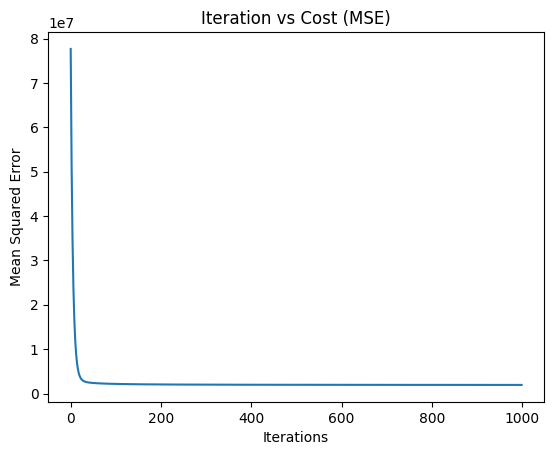

In [4]:
if __name__ == "__main__":
   
    file_path = r"C:\Users\pkmna\OneDrive\Documents\carprice.csv"
    
   
    predictor = CarPricePredictor(file_path)
    
    
    predictor.gradient_descent(alpha=0.1, iterations=1000)
    
  
    print("Learned weights (w):", predictor.w)
    print("Learned bias (b):", predictor.b)
    
   
    print("R2 score is %f" % predictor.R2score())
    
   
    plt.plot(predictor.cost_history)
    plt.title("Iteration vs Cost (MSE)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean Squared Error")
    plt.show()